In [10]:
import os 
import numpy as np
import pandas as pd 
from tqdm import tqdm
import glob 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torchvision
import torchvision.models as models 
import torchvision.transforms as transforms 
import torchvision.datasets as datasets
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [9]:
# pip install torchvision


     ---------------------------------------- 1.3/1.3 MB 19.9 MB/s eta 0:00:00


You should consider upgrading via the 'c:\AllClass\1204303_AI\final\Trainfoodmodel\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
ROOT_PATH = 'C:/AllClass/1204303_AI/final/Trainfoodmodel/Foods_dataset'
training_path = f'{ROOT_PATH}/training'
validation_path = f'{ROOT_PATH}/validation'
evaluation_path = f'{ROOT_PATH}/evaluation'

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [13]:
batch_size = 32 
image_size = 224

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [14]:
main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomErasing()
])

In [15]:
model = models.resnet34(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\praph/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:06<00:00, 14.2MB/s]


In [16]:
in_features = int(model.fc.in_features)
model.fc = nn.Linear(in_features, 11, device)

In [17]:
model = model.to(device)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [19]:
train_dataset = datasets.ImageFolder(training_path, transform=aug_transform)
evaluation_dataset = datasets.ImageFolder(evaluation_path, transform=main_transform)

In [20]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
evaluation_dataloader = DataLoader(evaluation_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


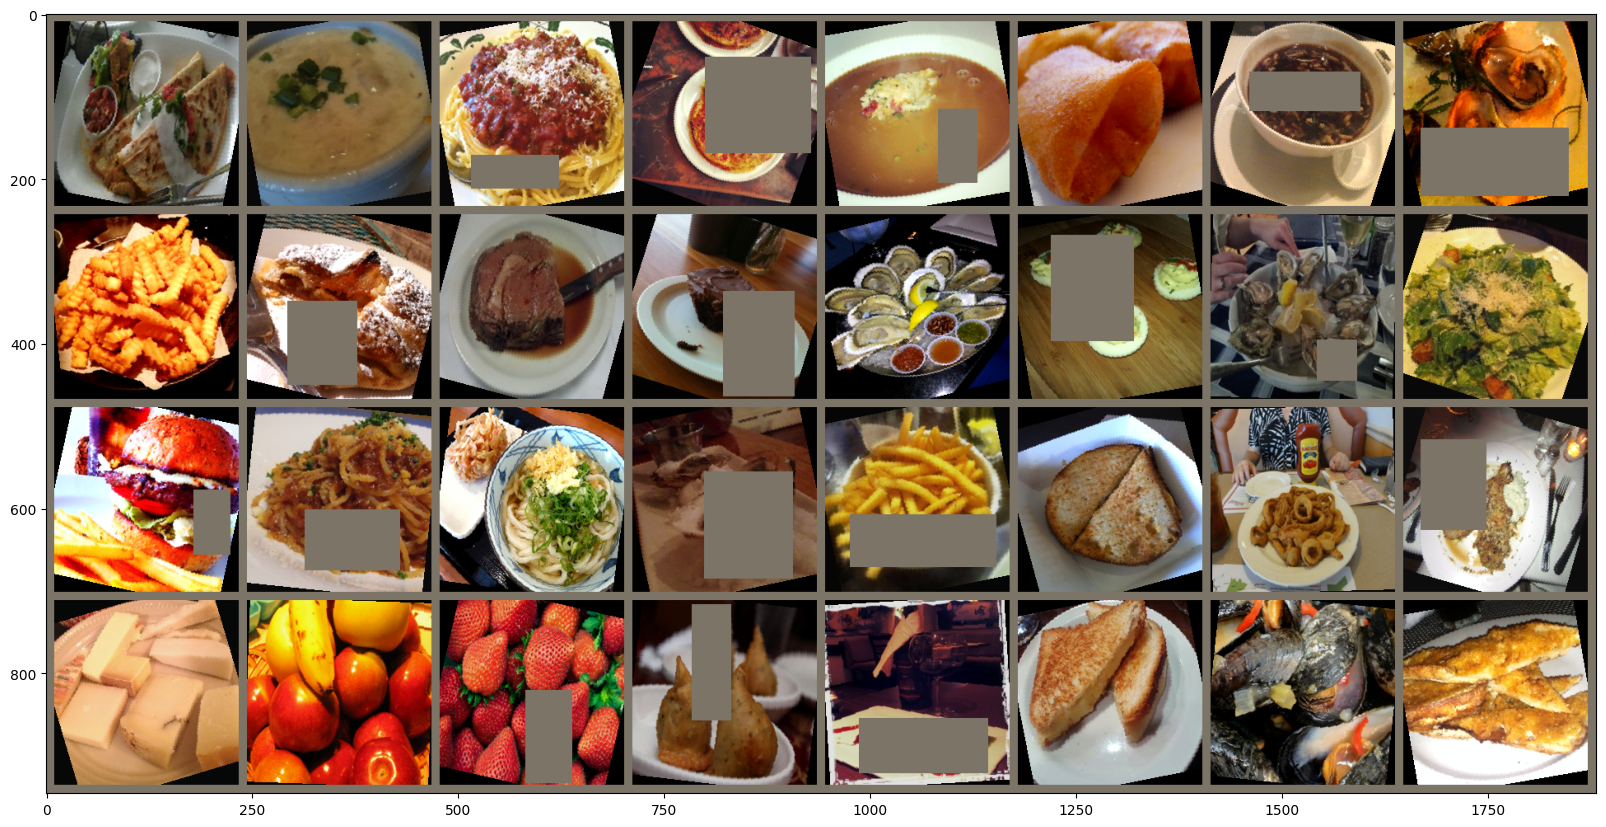

In [22]:
images, targets = next(iter(train_dataloader))
grid_images = torchvision.utils.make_grid(images, nrow=8, padding=10)

def imshow(images, mean, std):
    np_image = np.array(images).transpose((1, 2, 0))
    unnorm_image = np_image * std + mean
    plt.figure(figsize=(20, 20))
    plt.imshow(unnorm_image)
    
imshow(grid_images, mean, std)

In [23]:
num_epochs = 15
losses = [] 

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(tqdm(train_dataloader)):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f' % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))

 16%|█▌        | 50/309 [02:30<13:25,  3.11s/it]

Epoch [ 1/15], Step [ 50/308], Loss: 1.3774


 32%|███▏      | 100/309 [04:54<09:47,  2.81s/it]

Epoch [ 1/15], Step [100/308], Loss: 1.0858


 49%|████▊     | 150/309 [07:16<07:29,  2.83s/it]

Epoch [ 1/15], Step [150/308], Loss: 0.9430


 65%|██████▍   | 200/309 [09:48<05:36,  3.09s/it]

Epoch [ 1/15], Step [200/308], Loss: 0.7930


 81%|████████  | 250/309 [12:00<02:29,  2.53s/it]

Epoch [ 1/15], Step [250/308], Loss: 0.8017


 97%|█████████▋| 300/309 [14:03<00:22,  2.51s/it]

Epoch [ 1/15], Step [300/308], Loss: 0.6777


 16%|█▌        | 50/309 [02:30<12:30,  2.90s/it]

Epoch [ 2/15], Step [ 50/308], Loss: 0.4609


 32%|███▏      | 100/309 [04:56<10:00,  2.87s/it]

Epoch [ 2/15], Step [100/308], Loss: 0.6788


 49%|████▊     | 150/309 [07:21<07:35,  2.86s/it]

Epoch [ 2/15], Step [150/308], Loss: 0.2726


 65%|██████▍   | 200/309 [09:52<05:11,  2.85s/it]

Epoch [ 2/15], Step [200/308], Loss: 0.4687


 81%|████████  | 250/309 [12:41<04:35,  4.66s/it]

Epoch [ 2/15], Step [250/308], Loss: 0.6444


 97%|█████████▋| 300/309 [15:20<00:27,  3.09s/it]

Epoch [ 2/15], Step [300/308], Loss: 0.5131


 16%|█▌        | 50/309 [02:40<13:00,  3.01s/it]

Epoch [ 3/15], Step [ 50/308], Loss: 0.4774


 32%|███▏      | 100/309 [05:18<11:08,  3.20s/it]

Epoch [ 3/15], Step [100/308], Loss: 0.4227


 49%|████▊     | 150/309 [07:55<08:13,  3.10s/it]

Epoch [ 3/15], Step [150/308], Loss: 0.5051


 65%|██████▍   | 200/309 [10:31<05:55,  3.26s/it]

Epoch [ 3/15], Step [200/308], Loss: 0.5252


 81%|████████  | 250/309 [13:11<03:06,  3.15s/it]

Epoch [ 3/15], Step [250/308], Loss: 0.2508


 97%|█████████▋| 300/309 [15:53<00:29,  3.23s/it]

Epoch [ 3/15], Step [300/308], Loss: 0.5071


 16%|█▌        | 50/309 [02:48<14:30,  3.36s/it]

Epoch [ 4/15], Step [ 50/308], Loss: 0.1844


 32%|███▏      | 100/309 [05:25<10:56,  3.14s/it]

Epoch [ 4/15], Step [100/308], Loss: 0.1693


 49%|████▊     | 150/309 [08:03<08:47,  3.31s/it]

Epoch [ 4/15], Step [150/308], Loss: 0.2593


 65%|██████▍   | 200/309 [10:43<05:45,  3.17s/it]

Epoch [ 4/15], Step [200/308], Loss: 0.3760


 81%|████████  | 250/309 [13:23<03:09,  3.20s/it]

Epoch [ 4/15], Step [250/308], Loss: 0.2640


 97%|█████████▋| 300/309 [15:59<00:28,  3.12s/it]

Epoch [ 4/15], Step [300/308], Loss: 0.2152


 16%|█▌        | 50/309 [02:41<12:53,  2.99s/it]

Epoch [ 5/15], Step [ 50/308], Loss: 0.1710


 32%|███▏      | 100/309 [05:16<10:31,  3.02s/it]

Epoch [ 5/15], Step [100/308], Loss: 0.1235


 49%|████▊     | 150/309 [07:49<08:04,  3.05s/it]

Epoch [ 5/15], Step [150/308], Loss: 0.3554


 65%|██████▍   | 200/309 [10:24<05:41,  3.13s/it]

Epoch [ 5/15], Step [200/308], Loss: 0.3191


 81%|████████  | 250/309 [12:59<03:23,  3.44s/it]

Epoch [ 5/15], Step [250/308], Loss: 0.2791


 97%|█████████▋| 300/309 [15:26<00:25,  2.86s/it]

Epoch [ 5/15], Step [300/308], Loss: 0.2053


 16%|█▌        | 50/309 [02:30<12:23,  2.87s/it]

Epoch [ 6/15], Step [ 50/308], Loss: 0.2249


 32%|███▏      | 100/309 [05:02<10:25,  2.99s/it]

Epoch [ 6/15], Step [100/308], Loss: 0.3487


 49%|████▊     | 150/309 [07:31<08:01,  3.03s/it]

Epoch [ 6/15], Step [150/308], Loss: 0.3738


 65%|██████▍   | 200/309 [10:01<05:12,  2.87s/it]

Epoch [ 6/15], Step [200/308], Loss: 0.1822


 81%|████████  | 250/309 [12:31<02:50,  2.90s/it]

Epoch [ 6/15], Step [250/308], Loss: 0.1070


 97%|█████████▋| 300/309 [14:56<00:27,  3.02s/it]

Epoch [ 6/15], Step [300/308], Loss: 0.4277


 16%|█▌        | 50/309 [02:30<12:50,  2.97s/it]

Epoch [ 7/15], Step [ 50/308], Loss: 0.1611


 32%|███▏      | 100/309 [04:59<09:59,  2.87s/it]

Epoch [ 7/15], Step [100/308], Loss: 0.0576


 49%|████▊     | 150/309 [07:24<07:42,  2.91s/it]

Epoch [ 7/15], Step [150/308], Loss: 0.1799


 65%|██████▍   | 200/309 [09:52<05:25,  2.99s/it]

Epoch [ 7/15], Step [200/308], Loss: 0.1548


 81%|████████  | 250/309 [12:23<02:59,  3.05s/it]

Epoch [ 7/15], Step [250/308], Loss: 0.1880


 97%|█████████▋| 300/309 [14:54<00:26,  2.98s/it]

Epoch [ 7/15], Step [300/308], Loss: 0.1005


 16%|█▌        | 50/309 [02:45<13:16,  3.08s/it]

Epoch [ 8/15], Step [ 50/308], Loss: 0.0831


 32%|███▏      | 100/309 [05:17<11:04,  3.18s/it]

Epoch [ 8/15], Step [100/308], Loss: 0.1978


 49%|████▊     | 150/309 [07:55<08:14,  3.11s/it]

Epoch [ 8/15], Step [150/308], Loss: 0.1042


 65%|██████▍   | 200/309 [10:27<05:34,  3.07s/it]

Epoch [ 8/15], Step [200/308], Loss: 0.2608


 81%|████████  | 250/309 [12:59<03:00,  3.06s/it]

Epoch [ 8/15], Step [250/308], Loss: 0.3110


 97%|█████████▋| 300/309 [15:33<00:27,  3.07s/it]

Epoch [ 8/15], Step [300/308], Loss: 0.1283


 16%|█▌        | 50/309 [02:36<12:48,  2.97s/it]

Epoch [ 9/15], Step [ 50/308], Loss: 0.0622


 32%|███▏      | 100/309 [05:11<10:20,  2.97s/it]

Epoch [ 9/15], Step [100/308], Loss: 0.2222


 49%|████▊     | 150/309 [07:42<08:12,  3.10s/it]

Epoch [ 9/15], Step [150/308], Loss: 0.0970


 65%|██████▍   | 200/309 [10:15<05:36,  3.08s/it]

Epoch [ 9/15], Step [200/308], Loss: 0.2238


 81%|████████  | 250/309 [12:49<03:03,  3.12s/it]

Epoch [ 9/15], Step [250/308], Loss: 0.1863


 97%|█████████▋| 300/309 [15:20<00:27,  3.03s/it]

Epoch [ 9/15], Step [300/308], Loss: 0.0944


 16%|█▌        | 50/309 [02:38<12:54,  2.99s/it]

Epoch [10/15], Step [ 50/308], Loss: 0.0180


 32%|███▏      | 100/309 [05:10<10:38,  3.05s/it]

Epoch [10/15], Step [100/308], Loss: 0.1937


 49%|████▊     | 150/309 [07:41<08:00,  3.02s/it]

Epoch [10/15], Step [150/308], Loss: 0.0545


 65%|██████▍   | 200/309 [10:14<05:37,  3.10s/it]

Epoch [10/15], Step [200/308], Loss: 0.2341


 81%|████████  | 250/309 [12:44<02:56,  2.99s/it]

Epoch [10/15], Step [250/308], Loss: 0.1594


 97%|█████████▋| 300/309 [15:15<00:26,  2.98s/it]

Epoch [10/15], Step [300/308], Loss: 0.2062


 16%|█▌        | 50/309 [02:36<12:45,  2.96s/it]

Epoch [11/15], Step [ 50/308], Loss: 0.0593


 32%|███▏      | 100/309 [05:05<10:22,  2.98s/it]

Epoch [11/15], Step [100/308], Loss: 0.2527


 49%|████▊     | 150/309 [07:36<07:58,  3.01s/it]

Epoch [11/15], Step [150/308], Loss: 0.1555


 65%|██████▍   | 200/309 [10:07<05:24,  2.98s/it]

Epoch [11/15], Step [200/308], Loss: 0.2105


 81%|████████  | 250/309 [12:37<02:56,  3.00s/it]

Epoch [11/15], Step [250/308], Loss: 0.0197


 97%|█████████▋| 300/309 [15:08<00:27,  3.08s/it]

Epoch [11/15], Step [300/308], Loss: 0.1289


 16%|█▌        | 50/309 [02:35<13:20,  3.09s/it]

Epoch [12/15], Step [ 50/308], Loss: 0.3897


 32%|███▏      | 100/309 [05:05<10:27,  3.00s/it]

Epoch [12/15], Step [100/308], Loss: 0.0952


 49%|████▊     | 150/309 [07:35<07:54,  2.99s/it]

Epoch [12/15], Step [150/308], Loss: 0.2854


 65%|██████▍   | 200/309 [10:09<05:25,  2.99s/it]

Epoch [12/15], Step [200/308], Loss: 0.1727


 81%|████████  | 250/309 [12:39<03:01,  3.07s/it]

Epoch [12/15], Step [250/308], Loss: 0.1274


 97%|█████████▋| 300/309 [15:09<00:26,  2.95s/it]

Epoch [12/15], Step [300/308], Loss: 0.0391


 16%|█▌        | 50/309 [02:38<13:28,  3.12s/it]

Epoch [13/15], Step [ 50/308], Loss: 0.2115


 32%|███▏      | 100/309 [05:10<10:23,  2.98s/it]

Epoch [13/15], Step [100/308], Loss: 0.4159


 49%|████▊     | 150/309 [07:43<08:12,  3.10s/it]

Epoch [13/15], Step [150/308], Loss: 0.2694


 65%|██████▍   | 200/309 [10:15<05:29,  3.03s/it]

Epoch [13/15], Step [200/308], Loss: 0.0596


 81%|████████  | 250/309 [12:48<02:57,  3.02s/it]

Epoch [13/15], Step [250/308], Loss: 0.0446


 97%|█████████▋| 300/309 [15:20<00:27,  3.05s/it]

Epoch [13/15], Step [300/308], Loss: 0.2730


 16%|█▌        | 50/309 [02:37<13:17,  3.08s/it]

Epoch [14/15], Step [ 50/308], Loss: 0.0812


 32%|███▏      | 100/309 [05:10<10:28,  3.01s/it]

Epoch [14/15], Step [100/308], Loss: 0.0719


 49%|████▊     | 150/309 [07:41<08:07,  3.06s/it]

Epoch [14/15], Step [150/308], Loss: 0.1171


 65%|██████▍   | 200/309 [10:14<05:28,  3.01s/it]

Epoch [14/15], Step [200/308], Loss: 0.0444


 81%|████████  | 250/309 [12:44<02:56,  2.98s/it]

Epoch [14/15], Step [250/308], Loss: 0.1323


 97%|█████████▋| 300/309 [15:15<00:26,  2.98s/it]

Epoch [14/15], Step [300/308], Loss: 0.2396


 16%|█▌        | 50/309 [02:40<12:10,  2.82s/it]

Epoch [15/15], Step [ 50/308], Loss: 0.0304


 32%|███▏      | 100/309 [05:02<09:45,  2.80s/it]

Epoch [15/15], Step [100/308], Loss: 0.2354


 49%|████▊     | 150/309 [07:25<07:31,  2.84s/it]

Epoch [15/15], Step [150/308], Loss: 0.2297


 65%|██████▍   | 200/309 [09:47<05:13,  2.88s/it]

Epoch [15/15], Step [200/308], Loss: 0.0556


 81%|████████  | 250/309 [12:09<02:46,  2.82s/it]

Epoch [15/15], Step [250/308], Loss: 0.1775


 97%|█████████▋| 300/309 [14:32<00:25,  2.83s/it]

Epoch [15/15], Step [300/308], Loss: 0.1027


100%|██████████| 309/309 [14:56<00:00,  2.90s/it]


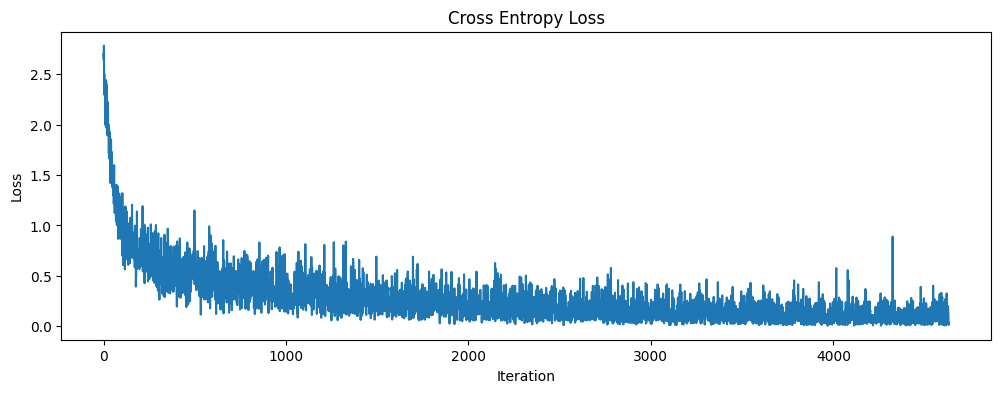

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.show()

In [25]:
def evaluate_model(model, dataloader, device):
    model.eval()
    corrects = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
    print(f'accuracy: {100.0 * corrects / len(dataloader.dataset)}')

In [26]:
evaluate_model(model, evaluation_dataloader, device)

accuracy: 92.82939910888672


In [28]:
file_path = 'resnet_model_food.pth'
torch.save(model.state_dict(), file_path)

In [38]:
# pip install PIL
img= Image.open(os.path.join("Foods_dataset/validation/Egg/3.jpg"))
# img= Image.open("Trainfoodmodel/Foods_dataset/validation/Egg/3.jpg")

In [41]:
# print(img)
image = []
img = img.resize((256,256))
image.append(img)
img = np.asarray(img, dtype= np.float32)
img = img / 255
img = img.reshape(-1,256,256,3)
predict = model.predict(img)



ValueError: cannot resize this array: it does not own its data

: 